### Import the libraries

In [12]:
from sklearn.model_selection import  learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, tree 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [3]:
bioresponce = pd.read_csv('./bioresponse.csv', header=0, sep=',')
bioresponce_target = bioresponce.Activity.values
bioresponce_data = bioresponce.iloc[:, 1:]

In [60]:
# splitting the data into train and test
train_data, test_data, train_labels, test_labels = train_test_split(bioresponce_data, 
                                                                    bioresponce_target, 
                                                                    test_size = 0.25,
                                                                    random_state = 1)

### Function for logistic regression method 

In [177]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s


# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b


# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A+1e-5),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


# optimize

def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

# model

def model(X_train, Y_train, X_test, Y_test, optimize, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    # Print train/test Errors
    print(optimize.__name__ + " train accuracy: {} %".format(train_accuracy))
    print(optimize.__name__ + " test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
    
    return d

### Train model with gradient descent (GD)

In [183]:
gd_model = model(train_data.to_numpy().T, train_labels, test_data.to_numpy().T, test_labels, gradient_descent, print_cost=True)

Cost after iteration 0: 0.693138
Cost after iteration 100: 1.074358
Cost after iteration 200: 0.873469
Cost after iteration 300: 0.786566
Cost after iteration 400: 0.733056
Cost after iteration 500: 0.695619
Cost after iteration 600: 0.671448
Cost after iteration 700: 0.521166
Cost after iteration 800: 0.539378
Cost after iteration 900: 0.712556
Cost after iteration 1000: 0.453134
Cost after iteration 1100: 0.674646
Cost after iteration 1200: 0.651958
Cost after iteration 1300: 0.447522
Cost after iteration 1400: 0.446516
Cost after iteration 1500: 0.566581
Cost after iteration 1600: 0.727518
Cost after iteration 1700: 0.676560
Cost after iteration 1800: 0.576005
Cost after iteration 1900: 0.513597
gradient_descent train accuracy: 80.09242801279773 %
gradient_descent test accuracy: 71.00213219616205 %


### Implemention the stochastic gradient descent (SGD) method

In [111]:
def stochastic_gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        index = np.random.choice(X.shape[1], size=1, replace=False)[0]
        
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,np.expand_dims(X[:,index],axis=1),Y[index])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Train model with stochastic gradient descent (SGD)

In [184]:
sgd_model = model(train_data.to_numpy().T, train_labels, test_data.to_numpy().T, test_labels, stochastic_gradient_descent, print_cost=True)

Cost after iteration 0: 0.693127
Cost after iteration 100: 11.512823
Cost after iteration 200: 0.002222
Cost after iteration 300: 53.724874
Cost after iteration 400: -0.000000
Cost after iteration 500: 1.173338
Cost after iteration 600: 0.000000
Cost after iteration 700: -0.000000
Cost after iteration 800: -0.000000
Cost after iteration 900: -0.000010
Cost after iteration 1000: -0.000010
Cost after iteration 1100: -0.000000
Cost after iteration 1200: 44.800681
Cost after iteration 1300: -0.000010
Cost after iteration 1400: 0.000000
Cost after iteration 1500: 0.000007
Cost after iteration 1600: -0.000000
Cost after iteration 1700: -0.000000
Cost after iteration 1800: -0.000010
Cost after iteration 1900: -0.000000
stochastic_gradient_descent train accuracy: 75.00888730892285 %
stochastic_gradient_descent test accuracy: 70.36247334754798 %


### Comparing two modifications of gradient descent 

In [191]:
def get_plot(l_rate):
    print('Accuracy of the models with learning_rate =', l_rate)
    gd_model_temp = model(train_data.to_numpy().T, train_labels, test_data.to_numpy().T, test_labels, gradient_descent, learning_rate=l_rate, print_cost=False)
    sgd_model_temp = model(train_data.to_numpy().T, train_labels, test_data.to_numpy().T, test_labels, stochastic_gradient_descent, learning_rate=l_rate, print_cost=False)
    print()
    accuracy_gd_sgd[l_rate] = [gd_model_temp["train_accuracy"], gd_model_temp["test_accuracy"], '', sgd_model_temp["train_accuracy"], sgd_model_temp["test_accuracy"]]
    iterations = range(0, gd_model_temp["num_iterations"], 100)

    plt.plot(iterations, gd_model_temp["costs"], 'r', label = 'gradient descent method')
    plt.plot(iterations, sgd_model_temp["costs"], 'b', label = 'stochastic gradient descent method')
    plt.xlabel("Iteration, N",fontsize = 10)
    plt.ylabel("Value of the loss function",fontsize = 10)
        
    plt.title(f'Learning rate: {l_rate}')
    plt.legend(fontsize = 10)

Accuracy of the models with learning_rate = 1e-05
gradient_descent train accuracy: 53.99928901528617 %
gradient_descent test accuracy: 54.90405117270789 %
stochastic_gradient_descent train accuracy: 53.99928901528617 %
stochastic_gradient_descent test accuracy: 54.90405117270789 %

Accuracy of the models with learning_rate = 0.0001
gradient_descent train accuracy: 55.31461073586918 %
gradient_descent test accuracy: 57.569296375266525 %
stochastic_gradient_descent train accuracy: 53.99928901528617 %
stochastic_gradient_descent test accuracy: 54.90405117270789 %

Accuracy of the models with learning_rate = 0.001
gradient_descent train accuracy: 73.16032705296836 %
gradient_descent test accuracy: 71.96162046908316 %
stochastic_gradient_descent train accuracy: 72.94703163881977 %
stochastic_gradient_descent test accuracy: 71.85501066098081 %

Accuracy of the models with learning_rate = 0.01
gradient_descent train accuracy: 78.99040170636331 %
gradient_descent test accuracy: 76.226012793176

,,1e-05,0.0001,0.001,0.01,0.1,1
0,Train accuracy GD,53.999289,55.314611,73.160327,78.990402,84.18059,83.185212
1,Test accuracy GD,54.904051,57.569296,71.96162,76.226013,76.759062,74.200426
2,,,,,,,
3,Train accuracy SGD,53.999289,53.999289,72.947032,70.778528,73.409172,72.129399
4,Test accuracy SGD,54.904051,54.904051,71.855011,68.123667,68.123667,71.428571


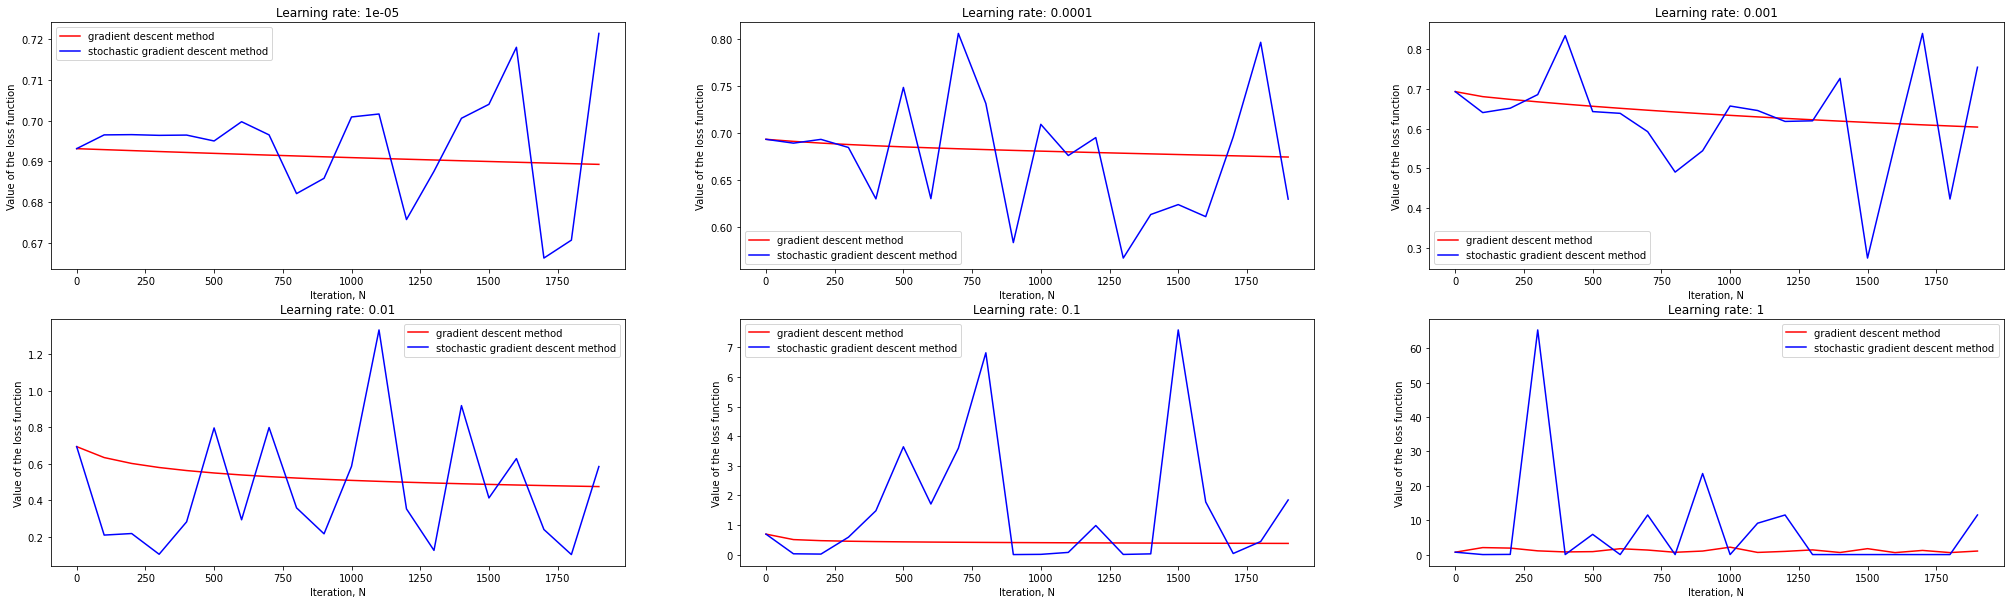

In [192]:
accuracy_gd_sgd = pd.DataFrame({'': ['Train accuracy GD', 'Test accuracy GD', '', 'Train accuracy SGD','Test accuracy SGD']})

plt.figure(figsize=(35, 10))

rate = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
for i in range(len(rate)):
    plt.subplot(2, 3, i+1)
    get_plot(rate[i])

accuracy_gd_sgd

The accuracy of models using gradient descent and stochastic gradient descent with the same learning rate less than 0.001 is approximately similar, but should pay attention to the unequal behavior: the SDG value of the loss function changes dramatically. The jumpy behavior is due to the fact that only one row of data is taken at each iteration. When the learning rate is greater than 0.001, the accuracy of the model with SGD begins to differ significantly from GD (in some cases, the difference reaches 10% for the worse).

### Implemention the Adam optimization method 

In [175]:
def adam_optimization(w, b, X, Y, num_iterations, learn_rate, print_cost = False, beta_1=0.9, beta_2=0.999, e=1e-8):
    
    costs = []
    
    
    first_moment_w = np.random.random((X.shape[0], 1))
    second_moment_w = np.random.random((X.shape[0], 1))
    first_unbias_w = np.random.random((X.shape[0], 1))
    second_unbias_w = np.random.random((X.shape[0], 1))
        
    first_moment_b = np.random.random()
    second_moment_b = np.random.random()
    first_unbias_b = np.random.random()
    second_unbias_b = np.random.random()
    
    iter = 0
    for i in range(num_iterations):
        iter += 1
         
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        first_moment_w = beta_1 * first_moment_w + (1 - beta_1)*dw
        second_moment_w = beta_2 * second_moment_w + (1 - beta_2)*dw**2
        first_unbias_w = first_moment_w / (1 - beta_1**iter)
        second_unbias_w = second_moment_w / (1 - beta_2**iter)

        first_moment_b = beta_1 * first_moment_b + (1 - beta_1)*db
        second_moment_b = beta_2 * second_moment_b + (1 - beta_2)*db**2
        first_unbias_b = first_moment_b / (1 - beta_1**iter)
        second_unbias_b = second_moment_b / (1 - beta_2**iter)
        
        w -= learn_rate * np.divide( first_unbias_w, (np.sqrt(second_unbias_w) + e) )
        b -= learn_rate * first_unbias_b / (np.sqrt(second_unbias_b) + e)
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

### Train model with Adam optimization method

In [178]:
adam_model = model(train_data.to_numpy().T, train_labels, test_data.to_numpy().T, test_labels, adam_optimization, print_cost=True)

Cost after iteration 0: 0.693138
Cost after iteration 100: 4.620932
Cost after iteration 200: 1.390930
Cost after iteration 300: 0.920179
Cost after iteration 400: 0.687690
Cost after iteration 500: 0.558325
Cost after iteration 600: 0.485650
Cost after iteration 700: 0.438492
Cost after iteration 800: 0.405042
Cost after iteration 900: 0.379048
Cost after iteration 1000: 0.360763
Cost after iteration 1100: 0.346931
Cost after iteration 1200: 0.336034
Cost after iteration 1300: 0.327207
Cost after iteration 1400: 0.319701
Cost after iteration 1500: 0.313129
Cost after iteration 1600: 0.307245
Cost after iteration 1700: 0.301886
Cost after iteration 1800: 0.296940
Cost after iteration 1900: 0.292330
adam_optimization train accuracy: 88.51759687166725 %
adam_optimization test accuracy: 74.09381663113007 %


### Comparing the accuracy of the model fitted using Adam optimization with the models trained by the classic GD and SGD algorithms

learning_rate = 0.5

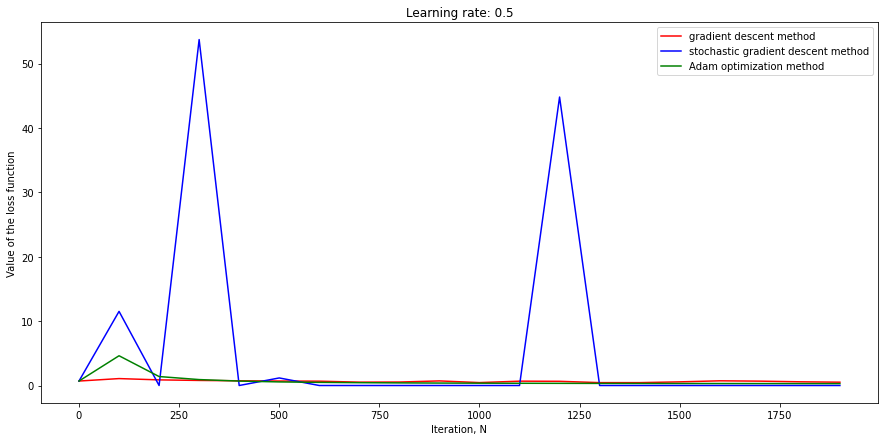

In [189]:
plt.figure(figsize=(15, 7))

iterations = range(0, gd_model["num_iterations"], 100)

plt.plot(iterations, gd_model["costs"], 'r', label = 'gradient descent method')
plt.plot(iterations, sgd_model["costs"], 'b', label = 'stochastic gradient descent method')
plt.plot(iterations, adam_model["costs"], 'g' ,label = 'Adam optimization method ')
plt.xlabel("Iteration, N",fontsize = 10)
plt.ylabel("Value of the loss function",fontsize = 10)
    
plt.title(f'Learning rate: {0.5}')
plt.legend(fontsize = 10)

In [186]:
accuracy_name = ['Train accuracy', 'Test accuracy']
accuracy_table = pd.DataFrame({     '': accuracy_name,
                                    'GD': [gd_model["train_accuracy"], gd_model["test_accuracy"]],
                                    'SGD': [sgd_model["train_accuracy"], sgd_model["test_accuracy"]],
                                    'Adam': [adam_model["train_accuracy"], adam_model["test_accuracy"]]})
accuracy_table

,,GD,SGD,Adam
0,Train accuracy,80.092428,75.008887,88.517597
1,Test accuracy,71.002132,70.362473,74.093817


The model using the Adam optimization method shows the best results for the expected model, approximated using models trained using the classical GD and SGD algorithms. Previous steps shown for learning rate = 0.5. 